<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/deeplearning_prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparation settings

* 런타임 유형 : GPU

In [16]:
!nvidia-smi

Mon Apr  5 07:04:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

* GPU 확인 : Persistance-M

In [17]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

* [Tensorflow](https://www.tensorflow.org/?hl=ko) : ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리

# Classify hand-written digits

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff).

**The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).** It's a first concrete example of a neural network which makes use of the Python library Keras, MNIST dataset.

### Ready for dataset

In [29]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* mnist.load_data() 함수는 '(x_train, y_train), (x_test, y_test)'값을 반환하므로 (train_images, train_labels), (test_images, test_labels) 변수로 반환값을 받는다.
* `train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

###\* Tensor

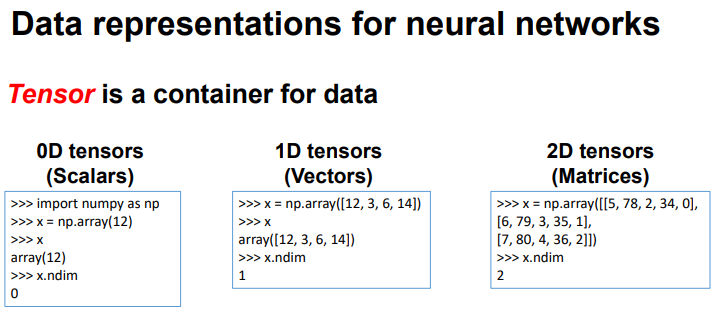

* Rank : number of axes can be checked by .ndim for numpy object
* Shape : dimensions the tensor has along each axes can be checked by .shape for numpy object
* Data type : type and bit you use can be checked by .dtype for numpy object

In [34]:
print(train_images.ndim,
      train_images.shape,
      train_images.dtype,)

import numpy as np
np.max(train_images)

3 (60000, 28, 28) uint8


255

* The train set has 60000 observations, 28 pixels by 28 pixels

In [31]:
print(test_images.shape,
      len(test_labels),
      test_labels)

(10000, 28, 28) 10000 [7 2 1 ... 4 5 6]


* The test tet has 10000 observations, 28 pixels by 28 pixels

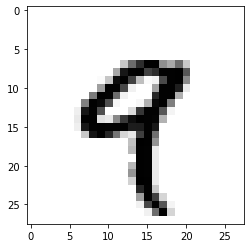

In [32]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

* Visualization

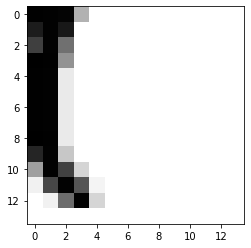

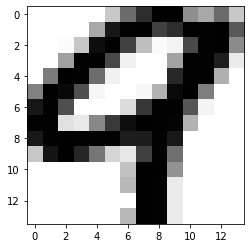

In [45]:
my_slice_1 = train_images[4, 14:, 14:]
plt.imshow(my_slice_1, cmap=plt.cm.binary) 
plt.show()

my_slice_2 = train_images[4, 7:-7, 7:-7]
plt.imshow(my_slice_2, cmap=plt.cm.binary) 
plt.show()

* Visualization with slicing

### Defining model

First, we will present our neural network with the training data, 'train_images' and 'train_labels'.

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

* Core building block of neural network is layers
* Layers extract representations
* This step define our model image.png = f(x;weights)

### Comfile

Second, prepare for network training

In [22]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

* Loss function [Loss(image.png, y)] : Measure how good a job it is doing on its training data, and how it will be able to steer itself in the right direction
* Optimizer : Minimize the loss funcion with respect to weights
* Metrics : Monitor during training and testing

In [23]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

* Rescale values from [0, 255] to [0, 1]

In [24]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* Categorically encode the labels

### Fit

Third, the network will learn to associate images and labels.

In [25]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.4329 - accuracy: 0.8730
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1109 - accuracy: 0.9673
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0486 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9892


* The "loss" of the network over the training data, and the "accuracy" of the network over the training data is displayed during training

### Test

Finally, we will ask the network to produce predictions for 'test_images', and we will verify if these predictions match the labels from 'test_labels'.

In [26]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9817


In [27]:
print('test_acc:', test_acc)

test_acc: 0.9817000031471252


* This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data

You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which layers are made of, and about gradient descent, which allows our network to learn from its training examples.